In [1]:
library(ggplot2)
library(scales)
library(plyr)
library(dplyr)
library(nycflights13)

theme_set(theme_bw())


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Daily volume of flights

In [2]:
plot_data <- flights %>%
  filter(month == 2) %>%
  mutate(date=as.Date(paste(year, month, day, sep='-'))) %>%
  group_by(date) %>%
  summarize(n=n())

head(plot_data)

date,n
2013-02-01,926
2013-02-02,682
2013-02-03,814
2013-02-04,932
2013-02-05,896
2013-02-06,901


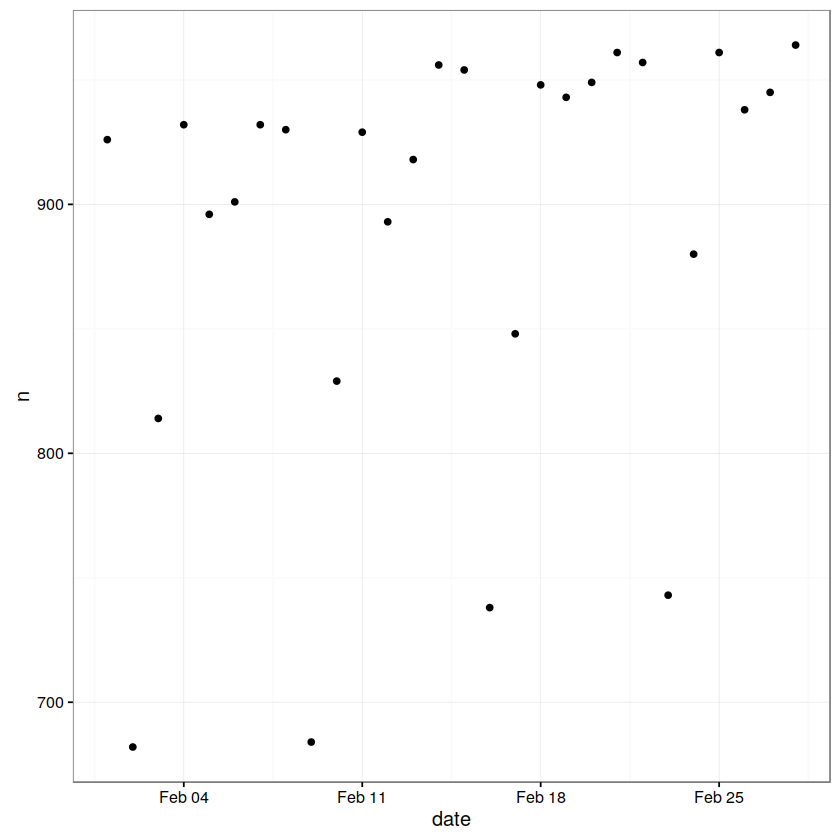

In [3]:
p <- ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point()
p

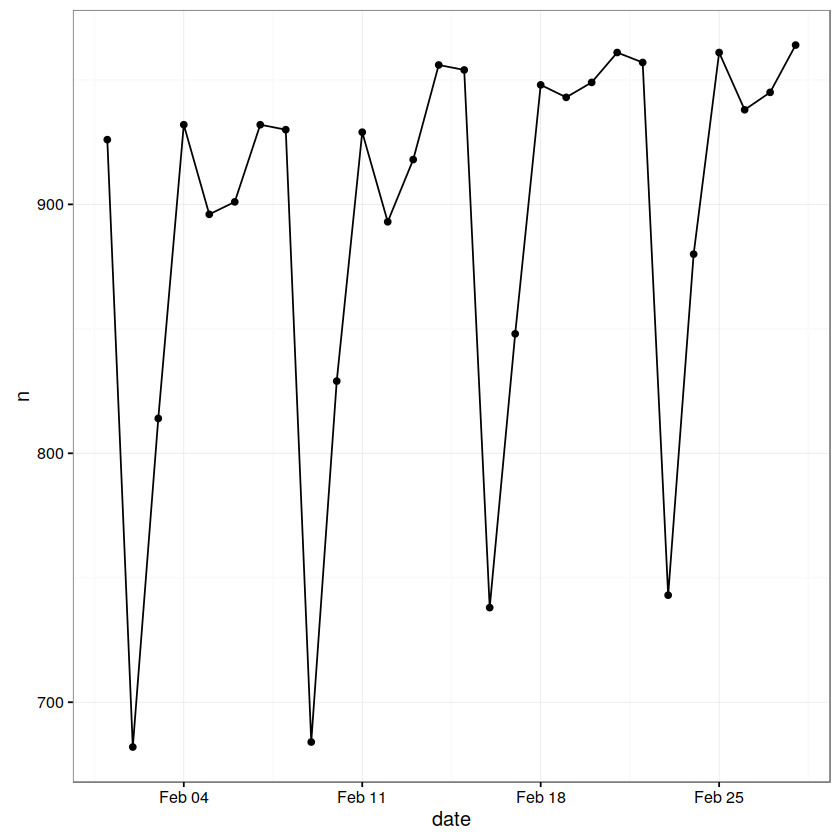

In [4]:
p <- p + 
  geom_line()
p

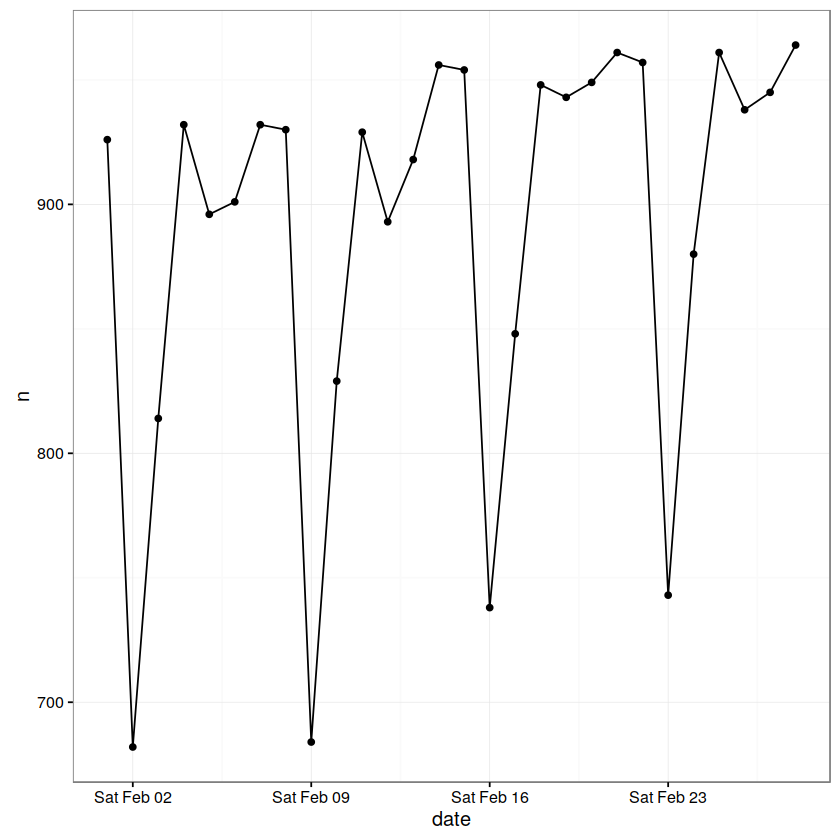

In [5]:
saturdays <- plot_data %>%
  filter(strftime(date, format='%u') == 6) %>%
  select(date)
p <- p + 
  scale_x_date(breaks=saturdays$date, date_label='%a %b %d')
p

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


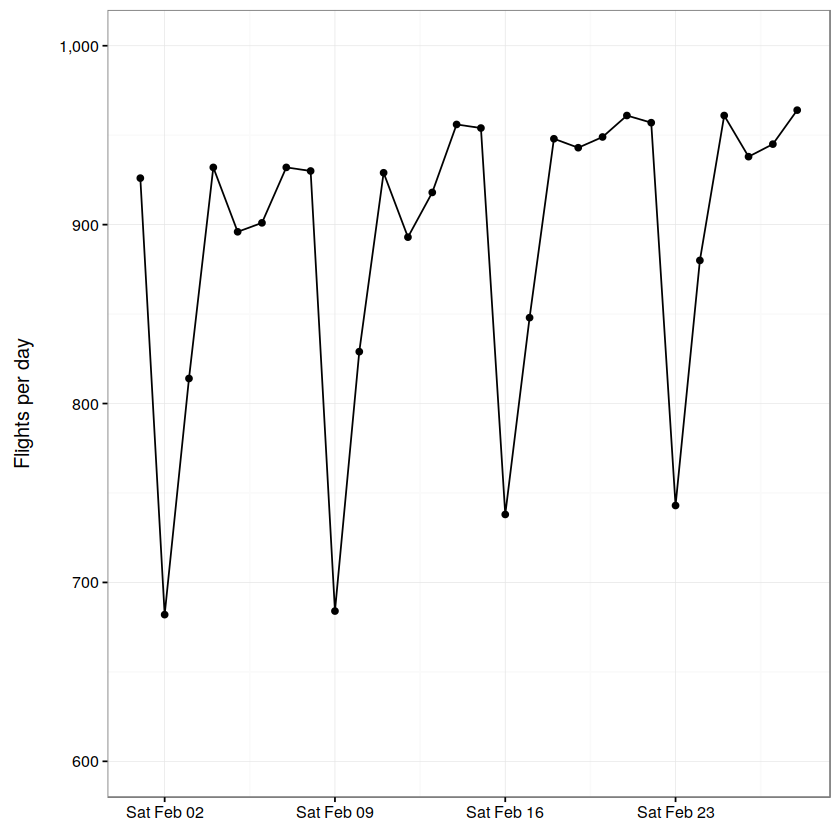

In [6]:
p <- p + 
  scale_x_date(element_blank(), breaks=saturdays$date, date_label='%a %b %d') +
  scale_y_continuous("Flights per day\n", limits=c(600, 1000), labels=comma)
p

## Flight delays

In [7]:
plot_data <- flights %>%
  mutate(delay=arr_delay, big_delay=ifelse(delay > 15, 1, 0)) %>%
  group_by(carrier) %>%
  summarize(p_big_delay=mean(big_delay, na.rm=TRUE)) %>%
  join(airlines, by='carrier') %>%
  mutate(short_name=gsub('(\\w+).*', '\\1', name))

head(plot_data)

carrier,p_big_delay,name,short_name
9E,0.2492,Endeavor Air Inc.,Endeavor
AA,0.1879,American Airlines Inc.,American
AS,0.1439,Alaska Airlines Inc.,Alaska
B6,0.2611,JetBlue Airways,JetBlue
DL,0.1823,Delta Air Lines Inc.,Delta
EV,0.3136,ExpressJet Airlines Inc.,ExpressJet


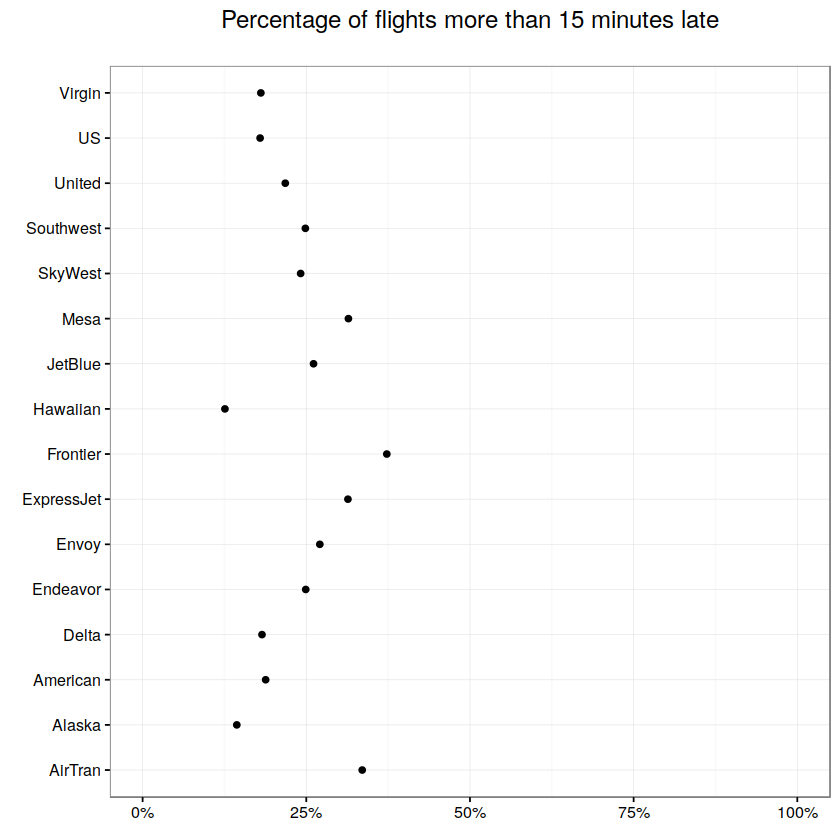

In [8]:
p <- ggplot(data=plot_data, aes(x=p_big_delay, y=short_name)) +
  geom_point() +
  scale_x_continuous(element_blank(), label=percent, limits=c(0, 1)) +
  scale_y_discrete(element_blank()) +
  ggtitle('Percentage of flights more than 15 minutes late\n')
p

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


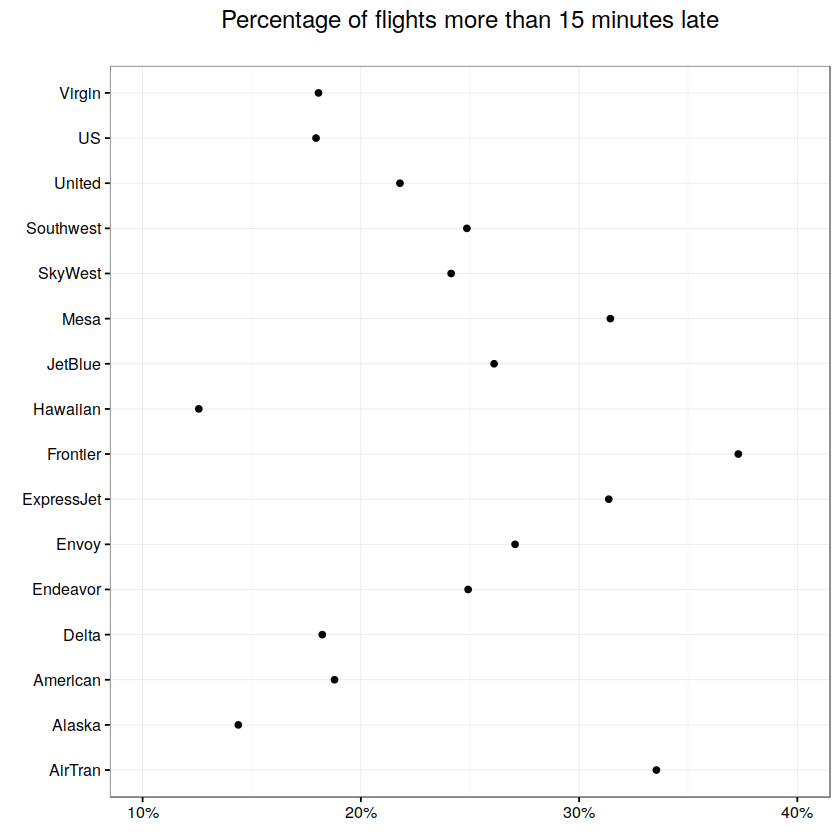

In [9]:
p <- p + 
  scale_x_continuous(element_blank(), label=percent, limits=c(.1, .4))
p

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


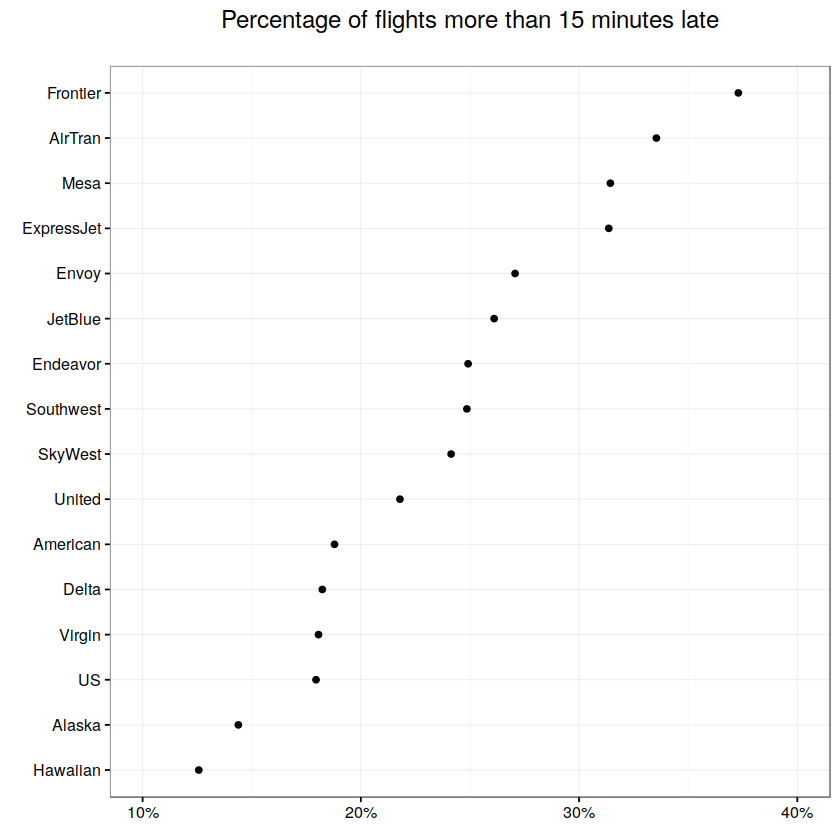

In [10]:
carriers_ranked <- plot_data %>%
  arrange(p_big_delay)
p <- p +  
  scale_x_continuous(element_blank(), label=percent, limits=c(.1, .4)) +
  scale_y_discrete(element_blank(), limits=carriers_ranked$short_name)
p

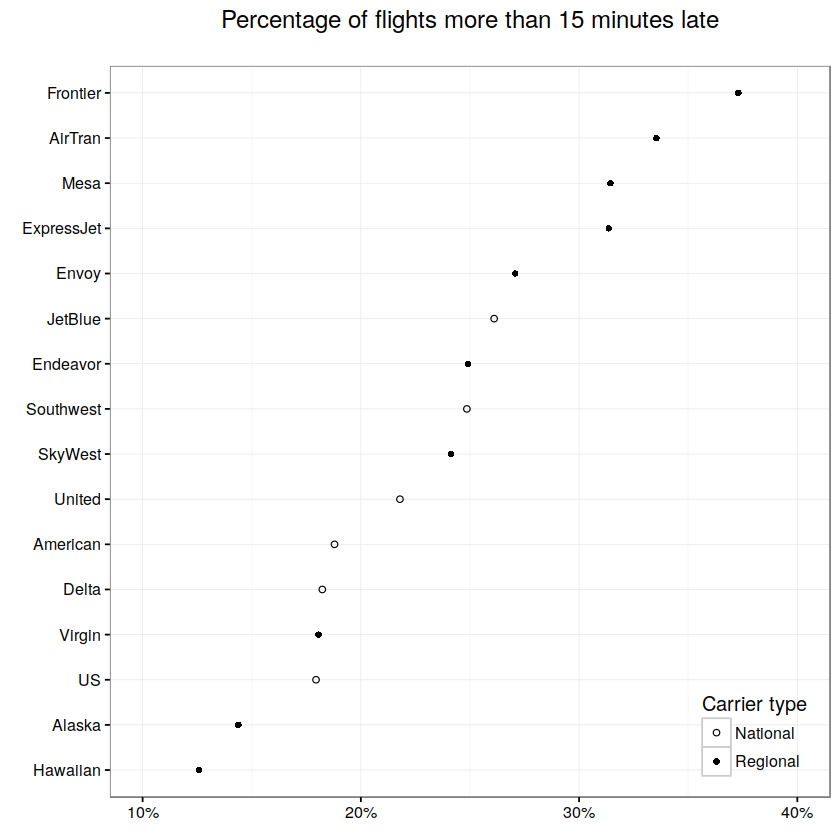

In [11]:
national <- c('JetBlue', 'Southwest', 'United', 'American', 'Delta', 'US')
plot_data <- plot_data %>%
  mutate(carrier_type=ifelse(short_name %in% national, 'National', 'Regional'))

p <- ggplot(data=plot_data, aes(x=p_big_delay, y=short_name)) +
  geom_point(aes(shape=carrier_type)) +
  scale_x_continuous(element_blank(), label=percent, limits=c(.1, .4)) +
  scale_y_discrete(element_blank(), limits=carriers_ranked$short_name) +
  scale_shape_manual('Carrier type', values=c(1, 16)) +
  theme(legend.position=c(1,0), legend.justification=c(1,0),
        legend.background=element_blank()) +
  ggtitle('Percentage of flights more than 15 minutes late\n')
p